### Confirm Tensorflow Installation

In [17]:
import tensorflow as tf
import tensorflow.keras as keras
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


### Importing the necessary modules

In [18]:
import numpy as np
import os
from os import listdir 
from os.path import isfile, join
import cv2

import tensorflow as tf
import tensorflow.keras as keras


### Loading and Preprocessing

In [19]:
#Data visiting – os.walk()

label_folder = []
total_size = 0
data_path = r"D:\cifar10\train"

#os.walk() generates the file names(dirpath, dirnames, filenames) 
#in a directory tree by walking the tree either top-down or bottom-up.
for root, dirts, files in os.walk(data_path): 
    for dirt in dirts:
        label_folder.append(dirt)
    total_size += len(files)

    
print("found",total_size,"files.")
print("folder:",label_folder)

found 50000 files.
folder: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [20]:
#Load image

base_x_train = []
base_y_train = []

for i in range(len(label_folder)):
    labelPath = data_path+r'\\'+label_folder[i]
    
    #listdir() returns a list containing the names of the entries in the directory given by path.
    #isfile() is used to check whether the specified path is an existing regular file or not.
    FileName = [f for f in listdir(labelPath) if isfile(join(labelPath, f))]
    
    for j in range(len(FileName)):
        path = labelPath+r'\\'+FileName[j]
        
        #use cv2.imread read image.
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        
        base_x_train.append(img)
        base_y_train.append(label_folder[i])


print(np.array(base_x_train).shape)
print(np.array(base_y_train).shape)
        

(50000, 32, 32, 3)
(50000,)


In [21]:
from tensorflow.keras.utils import to_categorical

#Convert a category vector to a binary (0 or 1) matrix-type representation

base_y_train = to_categorical(base_y_train)


print(np.array(base_x_train).shape)
print(np.array(base_y_train).shape)
        

(50000, 32, 32, 3)
(50000, 10)


### Splitting the Data into training and validation data

In [22]:
# Split into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split( \
    np.array(base_x_train), np.array(base_y_train), test_size=0.2, random_state = 0)

print("Training data:", x_train.shape, y_train.shape)
print("Validation data:", x_valid.shape, y_valid.shape)

Training data: (40000, 32, 32, 3) (40000, 10)
Validation data: (10000, 32, 32, 3) (10000, 10)


### Show the image

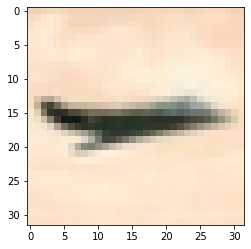

Answer: 0
Answer(one-hot): [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
import random
import matplotlib.pyplot as plt

idx = random.randint(0, x_train.shape[0])
plt.imshow(x_train[idx])
plt.show()

print("Answer:", np.argmax(y_train[idx]))
print("Answer(one-hot):", y_train[idx])

### Build the network

You can show the detail for it:

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [25]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 256)        

### Training the network

In [26]:
epoch = 15
batch_size = 30

model.compile(
    loss="categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)
history = model.fit(
    x_train, 
    y_train, 
    epochs=epoch, 
    batch_size=batch_size,
    validation_data=(x_valid, y_valid)
)

Epoch 1/15
1334/1334 [==============================] - 118s 88ms/step - loss: 1.9979 - accuracy: 0.3019 - val_loss: 1.7998 - val_accuracy: 0.3651
Epoch 2/15
1334/1334 [==============================] - 123s 93ms/step - loss: 1.5762 - accuracy: 0.4495 - val_loss: 1.4306 - val_accuracy: 0.4982
Epoch 3/15
1334/1334 [==============================] - 121s 91ms/step - loss: 1.3079 - accuracy: 0.5460 - val_loss: 1.8971 - val_accuracy: 0.3319
Epoch 4/15
1334/1334 [==============================] - 119s 90ms/step - loss: 1.0947 - accuracy: 0.6209 - val_loss: 1.1407 - val_accuracy: 0.6041
Epoch 5/15
1334/1334 [==============================] - 117s 88ms/step - loss: 0.9281 - accuracy: 0.6830 - val_loss: 0.9460 - val_accuracy: 0.6734
Epoch 6/15
1334/1334 [==============================] - 122s 92ms/step - loss: 0.7817 - accuracy: 0.7333 - val_loss: 0.8072 - val_accuracy: 0.7191
Epoch 7/15
1334/1334 [==============================] - 116s 87ms/step - loss: 0.6521 - accuracy: 0.7794 - val_loss: 0

### Saving the trained weights

In [27]:
model.save("my_model2.hdf5")

In [28]:
from tensorflow.keras.models import load_model
model2 = load_model("my_model2.hdf5")

In [29]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 256)        

In [30]:
y_hat = model2.predict(x_valid)

In [31]:
# 將output改為標籤
output_y = np.zeros(y_hat.shape[0])

for i in range(y_hat.shape[0]):
    for j in range(y_hat.shape[1]):
        if y_hat[i, j] >= max(y_hat[i, ]):
            output_y[i] = j

output_y

array([2., 3., 9., ..., 9., 7., 0.])

In [32]:
output_yv = np.zeros(y_valid.shape[0])

for i in range(y_valid.shape[0]):
    for j in range(y_valid.shape[1]):
        if y_valid[i, j] >= max(y_valid[i, ]):
            output_yv[i] = j

output_yv

array([2., 3., 9., ..., 9., 7., 0.])

In [33]:
sum(output_y == output_yv) / len(output_y)

0.7936

In [34]:
label_folder = []
total_size = 0
data_path = r"D:\cifar10\test"

#os.walk() generates the file names(dirpath, dirnames, filenames) 
#in a directory tree by walking the tree either top-down or bottom-up.
for root, dirts, files in os.walk(data_path): 
    for dirt in dirts:
        label_folder.append(dirt)
    total_size += len(files)

    
print("found",total_size,"files.")
print("folder:",label_folder)

found 10000 files.
folder: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [35]:
base_x_test = []
base_y_test = []

for i in range(len(label_folder)):
    labelPath = data_path+r'\\'+label_folder[i]
    
    #listdir() returns a list containing the names of the entries in the directory given by path.
    #isfile() is used to check whether the specified path is an existing regular file or not.
    FileName = [f for f in listdir(labelPath) if isfile(join(labelPath, f))]
    
    for j in range(len(FileName)):
        path = labelPath+r'\\'+FileName[j]
        
        #use cv2.imread read image.
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        
        base_x_test.append(img)
        base_y_test.append(label_folder[i])


print(np.array(base_x_test).shape)
print(np.array(base_y_test).shape)

(10000, 32, 32, 3)
(10000,)


In [36]:
y_final = model2.predict(np.array(base_x_test))

In [37]:
output_y2 = np.zeros(y_final.shape[0])

for i in range(y_final.shape[0]):
    for j in range(y_final.shape[1]):
        if y_final[i, j] >= max(y_final[i, ]):
            output_y2[i] = j

output_y2

array([0., 0., 0., ..., 9., 9., 9.])

In [40]:
output_y3 = np.zeros(to_categorical(base_y_test).shape[0])

for i in range(to_categorical(base_y_test).shape[0]):
    for j in range(to_categorical(base_y_test).shape[1]):
        if to_categorical(base_y_test)[i, j] >= max(to_categorical(base_y_test)[i, ]):
            output_y3[i] = j

output_y3

array([0., 0., 0., ..., 9., 9., 9.])

In [41]:
sum(output_y2 == output_y3)/to_categorical(base_y_test).shape[0]

0.7889